In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [18]:
dataroot = "E:\\PROJECTS\\UMAR\\Data\\chem\\"
pumping = pd.read_excel(dataroot + "MillvilleMaster.xlsx","PumpingSchedule")

In [19]:
pumping.columns

Index([                                       u'Date-time',
                  u'Pipe Meter Reading (gallons of water)',
                         u'Total Water Injected (gallons)',
                         u'Total Water Injected (acre-ft)',
                           u'Total Water Pumped (acre-ft)',
                        u'Volume Pumped / Volume Injected',
                                  u'Percent Garr of Water',
                                       u'Percent GR Water',
                    u'Volume of injectate recovered (gal)',
                            u'Volume of Host Pumped (gal)',
       u'Cumulative Volume of Injectate Recovered (ac-ft)',
            u'Cumulative Volume of Host Recovered (ac-ft)',
                             u'Ratio of Host to Injectate',
                                      u'Percent Recovered',
                                       u'Time delta (min)',
                                   u'Flow delta (gallons)',
                                     u'A

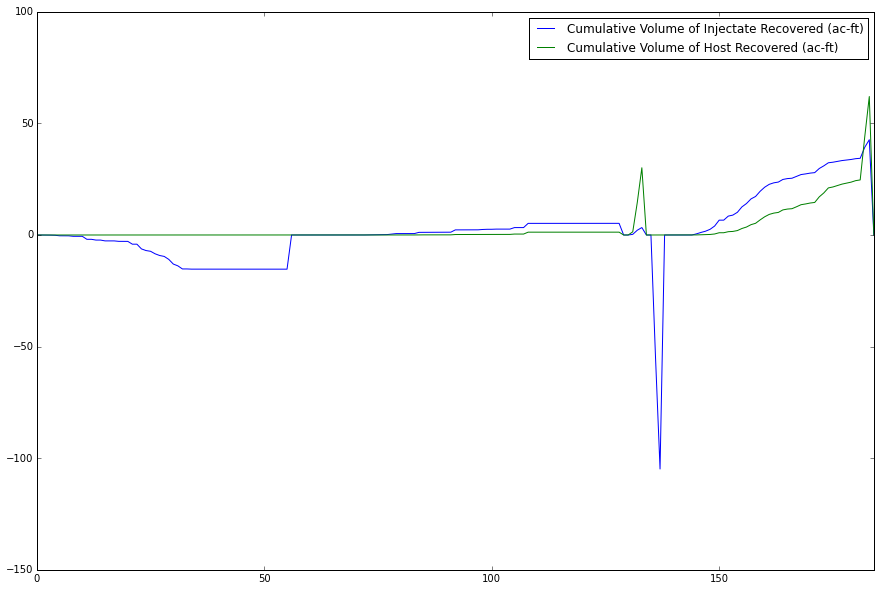

In [20]:
fig = plt.figure()
pumping[['Cumulative Volume of Injectate Recovered (ac-ft)','Cumulative Volume of Host Recovered (ac-ft)']].plot(kind='line')


In [39]:
pumping.reset_index(inplace=True)
pumping.set_index('Date-time',inplace=True)
pump = pumping.resample('1H')
pump = pump.interpolate(method='time')
pump = pump.resample('1D')

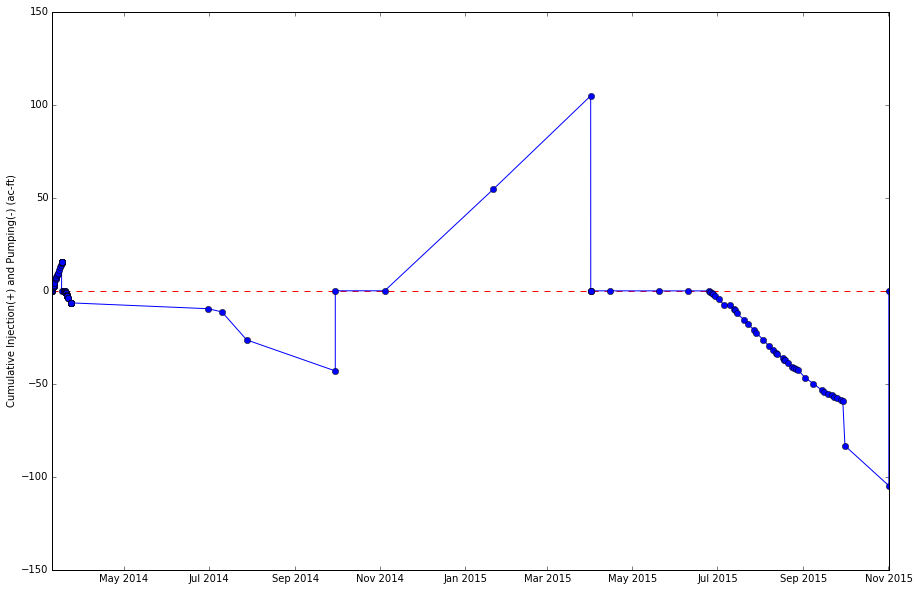

In [25]:
x = pumping.index
y = pumping['Percent GR Water']
y1 = pumping['Total Water Injected (acre-ft)']
plt.figure()
plt.plot(x,y1,'bo-')
plt.ylabel('Cumulative Injection(+) and Pumping(-) (ac-ft)')
plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='dashed',colors='red')

## Nitrate 

In [111]:
nitrate = pd.read_excel(dataroot + "MillvilleMaster.xlsx","NitrateOverTime")
nitrate.columns

Index([u'Source', u'SampleDate', u'ResultValue'], dtype='object')

In [112]:
nitrate.drop_duplicates(subset=['Source','SampleDate'], inplace=True)
nit =  nitrate.pivot(index='SampleDate', columns='Source', values='ResultValue')
nit = nit.resample('1H')
nit = nit.interpolate(method='time')
nit = nit.resample('1D')

In [113]:
?pd.DataFrame.sort()

In [114]:
nitrate.reset_index(inplace=True)
nitrate.sort(columns=['Source','SampleDate'], inplace=True)
nitrate.set_index(['SampleDate'], inplace=True)
del(nitrate['index'])

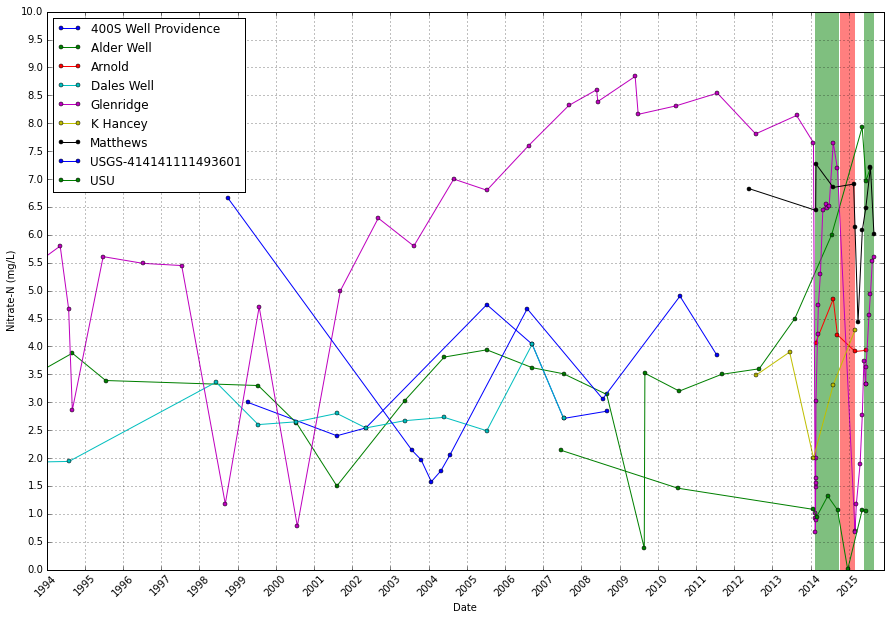

In [115]:
for key, grp in nitrate.groupby('Source'):
    plt.plot(grp.index, grp['ResultValue'],'-o',label=key, markersize=4) 
    plt.legend(loc='best')
plt.xlim('1/1/1995','1/1/2016')
plt.xlabel('Date')
plt.ylabel('Nitrate-N (mg/L)')
plt.ylim(0,10)

# Inject
## Phase I
a = '3/10/2014 11:02'
b = '3/19/2014 9:15'
## Phase II
c = '11/4/2014  11:16'
d = '4/1/2015 10:47'

# Pump
a1 = '3/19/2014 10:18'
b1 = '10/31/2014 0:00'
c1 = '6/25/2015 9:00'
d1 = '10/1/2015 0:00'

fmt = '%m/%d/%Y %H:%M'
a1 = datetime.datetime.strptime(a1,fmt)
b1 = datetime.datetime.strptime(b1,fmt)
c1 = datetime.datetime.strptime(c1,fmt)
d1 = datetime.datetime.strptime(d1,fmt)

a = datetime.datetime.strptime(a,fmt)
b = datetime.datetime.strptime(b,fmt)
c = datetime.datetime.strptime(c,fmt)
d = datetime.datetime.strptime(d,fmt)


plt.axvspan(a, b, color='r', alpha=0.5, lw=0)
plt.axvspan(c, d, color='r', alpha=0.5, lw=0)
plt.axvspan(a1, b1, color='g', alpha=0.5, lw=0)
plt.axvspan(c1, d1, color='g', alpha=0.5, lw=0)

plt.yticks(np.arange(0,10.5,0.5))
plt.xticks(pd.date_range('1/1/1994', '1/1/2016', freq='12M'),rotation=45)
plt.grid()

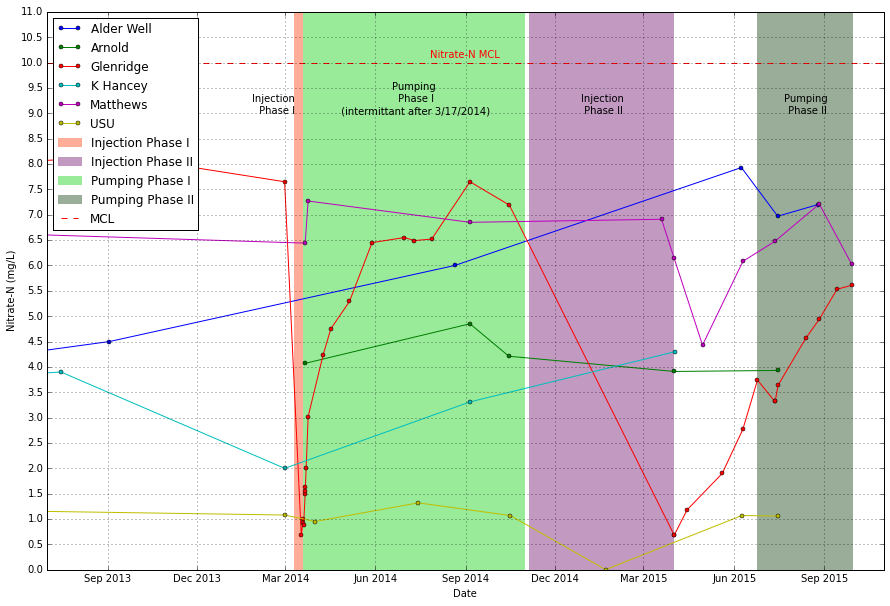

In [116]:
import datetime
for key, grp in nitrate.groupby('Source'):
    if grp.index.max() > datetime.datetime(2015,1,1):
        plt.plot(grp.index, grp['ResultValue'],'-o',label=key, markersize=4)

ly = 9.0
tmin = datetime.datetime.strptime('7/1/2013','%m/%d/%Y')
tmax = datetime.datetime.strptime('11/1/2015','%m/%d/%Y')

plt.axvspan(a, b, color='#FF3300', alpha=0.4, lw=0, label= 'Injection Phase I')
plt.axvspan(c, d, color='#660066', alpha=0.4, lw=0, label= 'Injection Phase II')
plt.axvspan(a1, b1, color='#00CC00', alpha=0.4, lw=0, label='Pumping Phase I')
plt.axvspan(c1, d1, color='#003300', alpha=0.4, lw=0, label='Pumping Phase II')
plt.text(a, ly, 'Injection \n Phase I', horizontalalignment='right')
plt.text(a1 + (b1 - a1)/2, ly, 'Pumping \n Phase I \n (intermittant after 3/17/2014)', horizontalalignment='center')
plt.text(c1 + (d1 - c1)/2, ly, 'Pumping \n Phase II', horizontalalignment='center')
plt.text(c + (d - c)/2, ly, 'Injection \n Phase II', horizontalalignment='center')
plt.text(tmin + (tmax-tmin)/2, 10.1, 'Nitrate-N MCL', color='red', horizontalalignment='center')
plt.xlim(tmin,tmax)
plt.xlabel('Date')
plt.ylabel('Nitrate-N (mg/L)')
#plt.xticks(pd.date_range(tmin, tmax, freq='2M').to_datetime(),rotation=45)
plt.hlines(10,'7/1/2013', '11/1/2015', color='red', label='MCL', linestyles='dashed')
plt.ylim(0,10.5)
plt.yticks(np.arange(0,11.5,0.5))
plt.legend(loc=2)
plt.grid(which='both')
plt.savefig('C:\Users\PAULINKENBRANDT\Google Drive\WORK\Millville\Writing\Year 2\Figures\NitrateShorterm.pdf')

In [84]:
def fcl(df, dtObj):
    '''
    finds closest date index in a dataframe to a date object
    
    df = dataframe
    dtObj = date object
    
    taken from: http://stackoverflow.com/questions/15115547/find-closest-row-of-dataframe-to-given-time-in-pandas
    '''
    return df.iloc[np.argmin(np.abs(df.index.to_pydatetime() - dtObj))]

In [43]:
pumping['nitrates'] = pumping.index.apply(lambda x: fcl(nitrate, x),1)